<a href="https://colab.research.google.com/github/romanrudniev/MachineLearning/blob/main/SupUnsupLearninig/Sup_Unsup_Learning(sport).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Аналіз спортивної команди"
Опис проєкту: Проєкт допомагає зрозуміти, як тренування впливають на результати гри команди, а також розподілити гравців за їхніми здібностями, щоб оптимізувати тренувальний процес.
1. Лінійна регресія: Прогноз очок у грі
Лінійна регресія використовується для передбачення результатів гри на основі тренувань.
Мета: Прогнозувати кількість очок команди залежно від часу тренувань.
Дані:
Training Hours (Години тренувань).
Game Points (Очки у грі).
2. Кластеризація: Розподіл гравців за здібностями
Кластеризація допомагає сегментувати гравців для оптимізації тренувань.
Мета: Групувати гравців за їхніми фізичними та ігровими показниками:
Speed (Швидкість).
Stamina (Витривалість).
Результат: Гравці розподілені в 3 категорії:
Швидкі та витривалі.
Середні за характеристиками.
Низька швидкість і витривалість.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##Перша частина

In [ ]:
np.random.seed(42)
training_hours = np.random.randint(1, 8, 30)
game_points = 10 * training_hours + np.random.randint(0, 30, 30)

print('training_hours: ', training_hours, len(training_hours))
print('game_points: ', game_points, len(game_points))

training_hours:  [7 4 5 7 3 5 5 7 2 3 7 3 3 5 4 3 6 5 2 4 6 6 2 4 5 1 4 2 6 5] 30
game_points:  [81 64 66 96 56 59 77 97 35 44 99 59 44 79 58 41 82 69 44 42 64 78 26 60
 58 16 57 23 84 77] 30


In [ ]:
data = {
    'training_hours': training_hours,
    'game_points': game_points,
}

df = pd.DataFrame(data)
print(df.head(10))

   training_hours  game_points
0               7           81
1               4           64
2               5           66
3               7           96
4               3           56
5               5           59
6               5           77
7               7           97
8               2           35
9               3           44


Поділ даних на тренувальні і тестувальні

In [ ]:
X = df[['training_hours']]
y = df['game_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

24 6 24 6


Модель

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

2. Кластеризація: Розподіл гравців за здібностями Кластеризація допомагає сегментувати гравців для оптимізації тренувань.
     Мета: Групувати гравців за їхніми фізичними та ігровими показниками: Speed (Швидкість).
     Stamina (Витривалість).
     Результат: Гравці розподілені в 3 категорії: Швидкі та витривалі. Середні за характеристиками. Низька швидкість і витривалість.

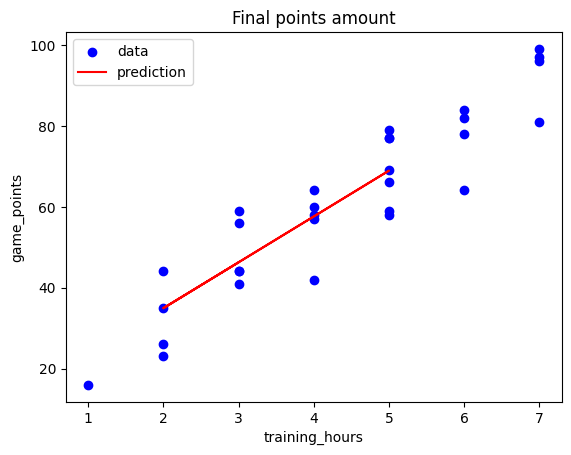

In [ ]:
plt.scatter(X, y, color="blue", label='data')
plt.plot(X_test, y_pred, color='red', label='prediction')
plt.title('Final points amount')
plt.xlabel('training_hours')
plt.ylabel('game_points')
plt.legend()
plt.show()

Друга частина:

In [ ]:
np.random.seed(42)
speed = np.random.randint(50, 100, 20)
stamina = np.random.randint(40, 90, 20)

print(speed)
print(stamina)

[88 78 64 92 57 70 88 68 72 60 60 73 85 89 73 52 71 51 73 93]
[69 77 41 60 72 51 61 83 64 88 66 81 67 55 54 86 83 42 76 46]


In [ ]:
players_data = {
    "speed" : speed,
    "stamina" : stamina
}

players_df = pd.DataFrame(players_data)

print(players_df)

    speed  stamina
0      88       69
1      78       77
2      64       41
3      92       60
4      57       72
5      70       51
6      88       61
7      68       83
8      72       64
9      60       88
10     60       66
11     73       81
12     85       67
13     89       55
14     73       54
15     52       86
16     71       83
17     51       42
18     73       76
19     93       46


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
players_df["cluster"] = kmeans.fit_predict(players_df[["speed","stamina"]])

print(players_df)

    speed  stamina  cluster
0      88       69        1
1      78       77        0
2      64       41        2
3      92       60        1
4      57       72        0
5      70       51        2
6      88       61        1
7      68       83        0
8      72       64        1
9      60       88        0
10     60       66        0
11     73       81        0
12     85       67        1
13     89       55        1
14     73       54        2
15     52       86        0
16     71       83        0
17     51       42        2
18     73       76        0
19     93       46        1


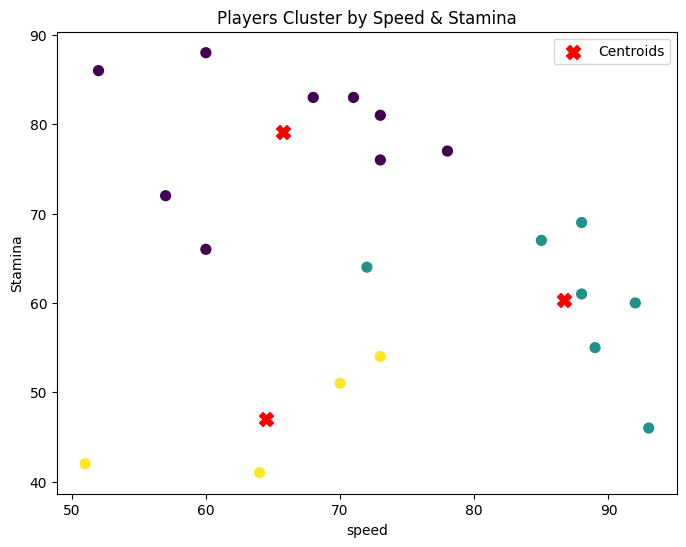

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(players_df['speed'],
            players_df['stamina'],
            c=players_df['cluster'],
            cmap='viridis',
            s=50
            )
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            c='red',
            marker='X',
            s=100,
            label='Centroids'
            )
plt.title('Players Cluster by Speed & Stamina')
plt.xlabel('speed')
plt.ylabel('Stamina')
plt.legend()
plt.show()

Висновок:
1. За допомогою лінійної регресії ми дізналися, що краще всього тренуватися від 2 до 5 годин.
2. Ми дізніличя що в спортивній команді є 3 типа гравців - з середньою швидкістю та витривалістю, швидкі але з середньою витривалістю, з середньою швидкістю але з великою витривалістю